In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

**Importing the dataset**

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
print(df.shape)
df.head()

(400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
df = df.drop_duplicates()

In [6]:
# Deleting unwanted columns based on problem statement
del df["User ID"]
del df["Gender"]

In [7]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


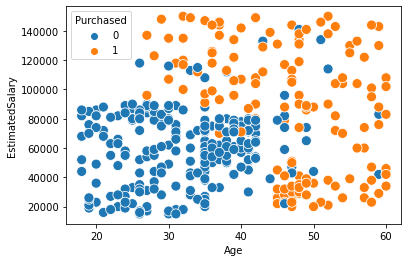

In [8]:
sns.scatterplot(data=df,x="Age",y="EstimatedSalary",hue="Purchased",s=100)
plt.show()

- Users aged 40 and above have a higher tendency to purchase a SUV car
- Also users earning an estimated salary greater than 90000 prefer to purchase a SUV car

<AxesSubplot:>

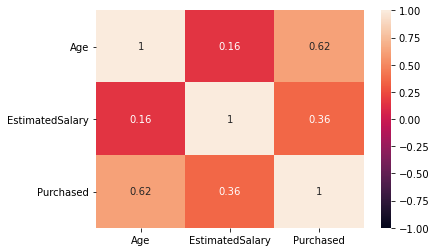

In [9]:
sns.heatmap(df.corr(),annot = True,vmin=-1)

- Age has a very good correlation of 0.62 with Purchased. Therefore it is an important feature

**Splitting the dataset into the Training set and Test set**

In [10]:
X = df[["Age","EstimatedSalary"]].values
y = df["Purchased"].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=20)

X_train.shape,X_test.shape

((280, 2), (120, 2))

**Feature Scaling**

In [11]:
scaler  = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train) 

X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

**Fitting Random Forest to the Training set**

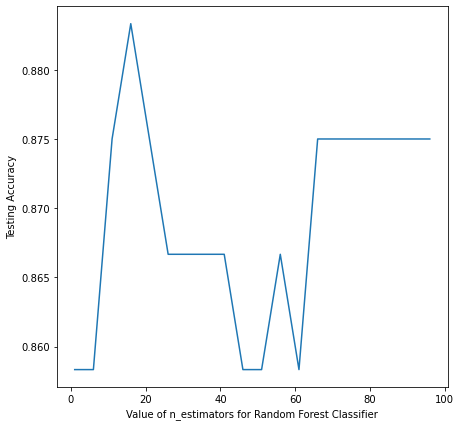

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
scores =[]
for k in range(1, 100,5):
    rfc = RandomForestClassifier(n_estimators = k,criterion="entropy",random_state=0)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.figure(figsize=(7,7))
plt.plot(range(1, 100,5), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

data = pd.DataFrame({"k_value":range(1, 100,5),"Accuracy":scores})

In [13]:
data=data.sort_values(by=["Accuracy"],ascending=False)
data.head()

,k_value,Accuracy
3,16,0.883333
19,96,0.875000
15,76,0.875000
2,11,0.875000
4,21,0.875000


- From hit and trial, we found n_estimators = 16 is the best value of hyper parameter and has the highest accuracy score.

**Predicting the Test set results**

In [14]:
rfc = RandomForestClassifier(n_estimators = 16,criterion="entropy",random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=16, random_state=0)

In [15]:
y_pred = rfc.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [16]:
df_pred = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df_pred

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
115,0,0
116,1,1
117,0,0
118,1,1


**Making the Confusion Matrix**

In [17]:
from sklearn.metrics import confusion_matrix,plot_roc_curve,ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred)
cm

array([[67,  3],
       [11, 39]], dtype=int64)

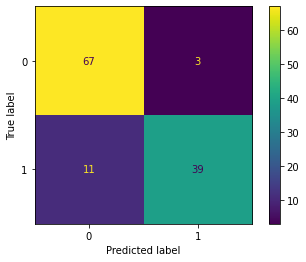

In [18]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm_display.plot()
plt.show()

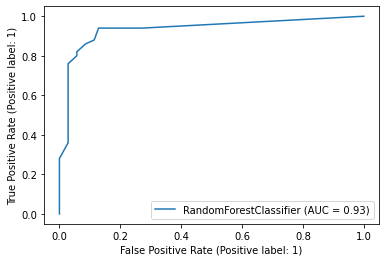

In [19]:
# ROC Curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rfc,X_test,y_test)

- AUC score is 0.93 . Generally AUC score 1 represents a perfect classifier and 0.5 represents a worthless classifier

**Visualising the Training set results**

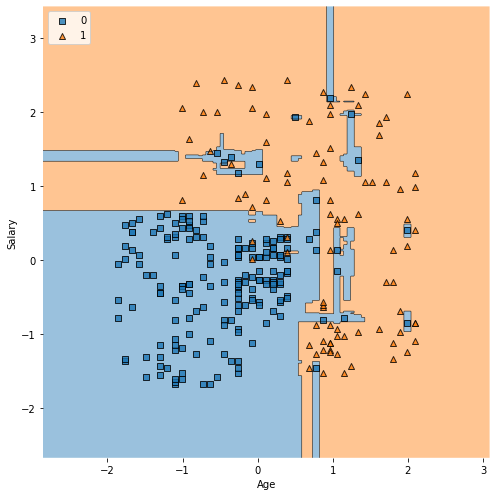

In [20]:
from mlxtend.plotting import plot_decision_regions
 
fig, ax = plt.subplots(figsize=(7, 7))
plot_decision_regions(X_train, y_train, clf=rfc)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

**Visualising the Test set results**

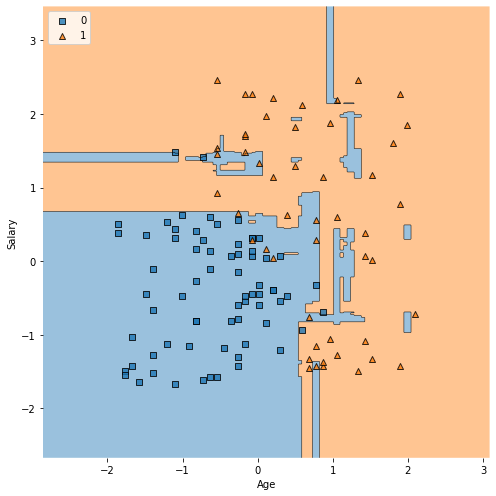

In [21]:

from mlxtend.plotting import plot_decision_regions
 
fig, ax = plt.subplots(figsize=(7, 7))
plot_decision_regions(X_test, y_test, clf=rfc)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()